In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from keras.layers import Dense,Flatten
from keras.models import Sequential

In [2]:
pip install opendatasets

In [3]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign")

Skipping, found downloaded files in "./skin-cancer-malignant-vs-benign" (use force=True to force download)


Train

In [4]:
dataset_train = "/content/skin-cancer-malignant-vs-benign/train"

import pathlib
dataset_train = pathlib.Path(dataset_train)

In [5]:
print(dataset_train)

/content/skin-cancer-malignant-vs-benign/train


/content/skin-cancer-malignant-vs-benign/train/benign/978.jpg


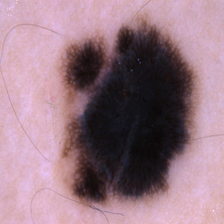

In [6]:
benign = list(dataset_train.glob('benign/*'))
print(benign[0])
PIL.Image.open(str(benign[0]))

/content/skin-cancer-malignant-vs-benign/train/malignant/978.jpg


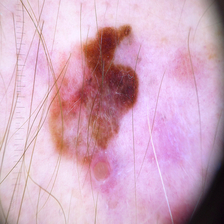

In [7]:
malignant = list(dataset_train.glob('malignant/*'))
print(malignant[0])
PIL.Image.open(str(malignant[0]))

In [8]:
img_height,img_width=50,50
data_dir= r'/content/skin-cancer-malignant-vs-benign/train'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               validation_split=0.2,
                                                               subset="training",
                                                               seed=123,
                                                               label_mode="categorical",
                                                               image_size=(img_height,img_width),
                                                               batch_size=None)

Found 2637 files belonging to 2 classes.
Using 2110 files for training.


In [9]:
import numpy as np
x_train = []
y_train = []
for i,j in train_ds:
  x_train.append(np.array(i))
  y_train.append(np.array(j))

x_train=np.array(x_train).reshape(-1,50,50,3)
y_train=np.array(y_train)

In [10]:
print(x_train.shape)
print(y_train.shape)

(2110, 50, 50, 3)
(2110, 2)


Validation

In [11]:
img_height,img_width=50,50
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               validation_split=0.2,
                                                               subset="validation",
                                                               seed=123,
                                                               label_mode="categorical",
                                                               image_size=(img_height,img_width),
                                                               batch_size=None)

Found 2637 files belonging to 2 classes.
Using 527 files for validation.


In [12]:
import numpy as np
x_val = []
y_val= []
for i,j in val_ds:
  x_val.append(np.array(i))
  y_val.append(np.array(j))

x_val=np.array(x_val).reshape(-1,50,50,3)
y_val=np.array(y_val)

In [13]:
print(x_val.shape)
print(y_val.shape)

(527, 50, 50, 3)
(527, 2)


test

In [14]:
img_height,img_width=50,50
data_dir= r'/content/skin-cancer-malignant-vs-benign/test'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               subset="training",
                                                               label_mode="categorical",
                                                               image_size=(img_height,img_width),
                                                               batch_size=None)

Found 660 files belonging to 2 classes.
Using 528 files for training.


In [15]:
import numpy as np
x_test = []
y_test = []
for i,j in test_ds:
  x_test.append(np.array(i))
  y_test.append(np.array(j))

x_test=np.array(x_test).reshape(-1,50,50,3)
y_test=np.array(y_test)

In [16]:
print(x_test.shape)
print(y_test.shape)

(528, 50, 50, 3)
(528, 2)


In [17]:
img_height,img_width=50,50
data_dir= r'/content/skin-cancer-malignant-vs-benign/test'
val_tr_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               validation_split=0.2,
                                                               subset="validation",
                                                               seed=123,
                                                               label_mode="categorical",
                                                               image_size=(img_height,img_width),
                                                               batch_size=None)

Found 660 files belonging to 2 classes.
Using 132 files for validation.


In [18]:
import numpy as np
x_tr_val = []
y_tr_val= []
for i,j in val_tr_ds:
  x_tr_val.append(np.array(i))
  y_tr_val.append(np.array(j))

x_tr_val=np.array(x_tr_val).reshape(-1,50,50,3)
y_tr_val=np.array(y_tr_val)

In [19]:
print(x_tr_val.shape)
print(y_tr_val.shape)

(132, 50, 50, 3)
(132, 2)


**Concatination of X_train,y_train,X_test,y_test**

In [20]:
x_train = np.concatenate((x_train, x_val), axis = 0)
y_train = np.concatenate((y_train, y_val), axis = 0)

x_test = np.concatenate((x_test, x_tr_val), axis = 0)
y_test = np.concatenate((y_test, y_tr_val), axis = 0)

In [21]:
print(x_train.shape)
print(y_train.shape)

(2637, 50, 50, 3)
(2637, 2)


In [22]:
print(x_test.shape)
print(y_test.shape)

(660, 50, 50, 3)
(660, 2)


Auto Encoder

In [23]:
encoding_dim=32
input_img=keras.Input(shape=(7500,))
encoded1= layers.Dense(3750,activation='ReLU')(input_img)
encoded2= layers.Dense(1875,activation='ReLU')(encoded1)
encoded3= layers.Dense(937,activation='ReLU')(encoded2)
encoded4= layers.Dense(468,activation='ReLU')(encoded3)
encoded5= layers.Dense(234,activation='ReLU')(encoded4)

encoded6= layers.Dense(encoding_dim,activation='ReLU')(encoded5)

decoded1= layers.Dense(234,activation='ReLU')(encoded6)
decoded2= layers.Dense(468,activation='ReLU')(decoded1)
decoded3= layers.Dense(937,activation='ReLU')(decoded2)
decoded4= layers.Dense(1875,activation='ReLU')(decoded3)
decoded5= layers.Dense(3750,activation='ReLU')(decoded4)
decoded6= layers.Dense(7500,activation='sigmoid')(decoded5)
autoencoder=keras.Model(input_img,decoded6)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7500)]            0         
                                                                 
 dense (Dense)               (None, 3750)              28128750  
                                                                 
 dense_1 (Dense)             (None, 1875)              7033125   
                                                                 
 dense_2 (Dense)             (None, 937)               1757812   
                                                                 
 dense_3 (Dense)             (None, 468)               438984    
                                                                 
 dense_4 (Dense)             (None, 234)               109746    
                                                                 
 dense_5 (Dense)             (None, 32)                7520  

Encoder Model

In [24]:
encoder=keras.Model(input_img,encoded6)

Decoder Model

In [25]:
encoded_input=keras.Input(shape=(encoding_dim,))
decoded_layer1=autoencoder.layers[-6](encoded_input)
decoded_layer2=autoencoder.layers[-5](decoded_layer1)
decoded_layer3=autoencoder.layers[-4](decoded_layer2)
decoded_layer4=autoencoder.layers[-3](decoded_layer3)
decoded_layer5=autoencoder.layers[-2](decoded_layer4)
decoded_layer6=autoencoder.layers[-1]
decoder=keras.Model(encoded_input,decoded_layer6(decoded_layer5))

In [26]:
x_train = x_train.astype('float32')/ 255 #0 -> 255 => 0 -> 1
x_test = x_test.astype('float32') / 255
x_val = x_val.astype('float32') / 255

In [27]:
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))#1*30000
x_train.shape

(2637, 7500)

In [28]:
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))#1*30000
x_test.shape

(660, 7500)

In [29]:
x_val = x_val.reshape((len(x_val),np.prod(x_val.shape[1:])))#1*7500
x_val.shape

(527, 7500)

In [30]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
autoencoder.fit(
  x_train,
  x_train,
  batch_size=16,
  epochs=5,
  validation_data=(x_test,x_test))

Epoch 1/5
165/165 [==============================] - 14s 34ms/step - loss: 0.6431 - accuracy: 0.0099 - val_loss: 0.6362 - val_accuracy: 0.0076
Epoch 2/5
165/165 [==============================] - 4s 26ms/step - loss: 0.6308 - accuracy: 0.0076 - val_loss: 0.6294 - val_accuracy: 0.0076
Epoch 3/5
165/165 [==============================] - 6s 34ms/step - loss: 0.6288 - accuracy: 0.0057 - val_loss: 0.6233 - val_accuracy: 0.0000e+00
Epoch 4/5
165/165 [==============================] - 5s 31ms/step - loss: 0.6216 - accuracy: 0.0061 - val_loss: 0.6138 - val_accuracy: 0.0061
Epoch 5/5
165/165 [==============================] - 5s 29ms/step - loss: 0.6148 - accuracy: 0.0057 - val_loss: 0.6121 - val_accuracy: 0.0030


21/21 [==============================] - 0s 4ms/step


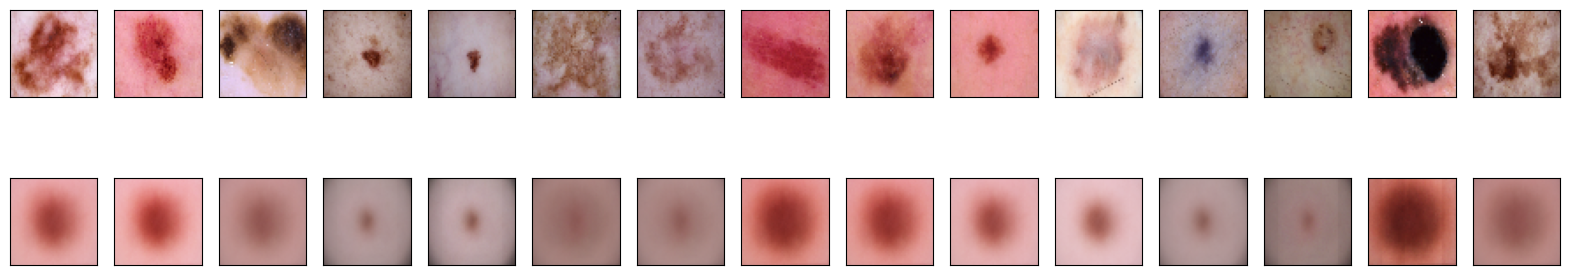

In [32]:
encoded_imgs=encoder.predict(x_test)

decoded_imgs=decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt
n=15
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(50,50,3))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax= plt.subplot(2,n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(50,50,3))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [33]:
encoded_imgs1=encoder.predict(x_train)

decoded_imgs1=decoder.predict(encoded_imgs1)

83/83 [==============================] - 0s 2ms/step


Autoencoder with Dense layers

In [34]:
model=Sequential()
model.add(autoencoder)
model.add(Dense(1875,activation='ReLU'))
model.add(Dense(468,activation='ReLU'))
model.add(Dense(128,activation='ReLU'))
model.add(Dense(2,activation='sigmoid'))

In [35]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
results=model.fit(
  x=decoded_imgs1,
  y=y_train,
  epochs=5,
  validation_data=(decoded_imgs,y_test)# to get acc of testing
)


Epoch 1/5
83/83 [==============================] - 8s 27ms/step - loss: 0.8190 - accuracy: 0.5135 - val_loss: 0.6899 - val_accuracy: 0.5455
Epoch 2/5
83/83 [==============================] - 2s 25ms/step - loss: 0.6926 - accuracy: 0.5294 - val_loss: 0.6893 - val_accuracy: 0.5455
Epoch 3/5
83/83 [==============================] - 2s 25ms/step - loss: 0.6910 - accuracy: 0.5461 - val_loss: 0.6894 - val_accuracy: 0.5455
Epoch 4/5
83/83 [==============================] - 2s 25ms/step - loss: 0.6910 - accuracy: 0.5423 - val_loss: 0.6912 - val_accuracy: 0.5455
Epoch 5/5
83/83 [==============================] - 2s 24ms/step - loss: 0.6892 - accuracy: 0.5461 - val_loss: 0.6912 - val_accuracy: 0.5455


21/21 [==============================] - 0s 2ms/step


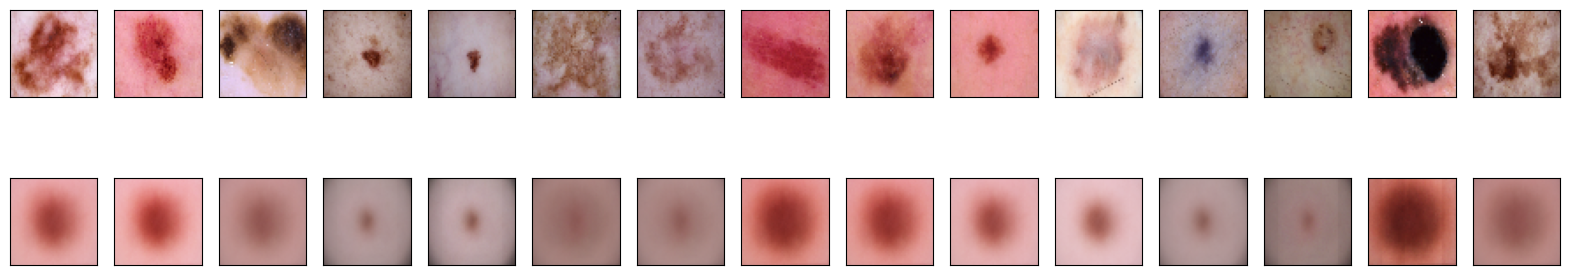

In [37]:
encoded_imgs2=encoder.predict(decoded_imgs)

decoded_imgs2=decoder.predict(encoded_imgs2)
import matplotlib.pyplot as plt
n=15
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(50,50,3))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax= plt.subplot(2,n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(50,50,3))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

encoder with Dense layers

In [38]:
model_enc=Sequential()#no need for flatten since it is a vector
model_enc.add(encoded_input)
model_enc.add(Dense(16,activation='ReLU'))
model_enc.add(Dense(2,activation='sigmoid'))

In [39]:
model_enc.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
print(encoded_imgs1.shape)
print(encoded_imgs.shape)
print(y_train.shape)
print(y_test.shape)

(2637, 32)
(660, 32)
(2637, 2)
(660, 2)


In [41]:
results=model_enc.fit(
  x=encoded_imgs1,
  y=y_train,
  epochs=5,
  validation_data=(encoded_imgs,y_test)# to get acc of testing
)

Epoch 1/5
83/83 [==============================] - 1s 6ms/step - loss: 0.6812 - accuracy: 0.5495 - val_loss: 0.6533 - val_accuracy: 0.6000
Epoch 2/5
83/83 [==============================] - 0s 4ms/step - loss: 0.6410 - accuracy: 0.6420 - val_loss: 0.6462 - val_accuracy: 0.6455
Epoch 3/5
83/83 [==============================] - 0s 4ms/step - loss: 0.6324 - accuracy: 0.6731 - val_loss: 0.6418 - val_accuracy: 0.6500
Epoch 4/5
83/83 [==============================] - 0s 4ms/step - loss: 0.6287 - accuracy: 0.6777 - val_loss: 0.6396 - val_accuracy: 0.6530
Epoch 5/5
83/83 [==============================] - 0s 4ms/step - loss: 0.6238 - accuracy: 0.6784 - val_loss: 0.6372 - val_accuracy: 0.6439


CNN after auto encoder

In [42]:
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten,AvgPool2D

In [43]:
from keras.api._v2.keras import activations
model_CNN = keras.Sequential()
model_CNN.add(Input(shape=(50,50,3)))
model_CNN.add(Conv2D(filters=6,kernel_size=5,strides=(1,1),padding='valid',activation='ReLU'))
model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model_CNN.add(Conv2D(filters=16,kernel_size=5,strides=(1,1),padding='valid',activation='ReLU'))
model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model_CNN.add(Flatten())
model_CNN.add(Dense(400,activation='ReLU'))
model_CNN.add(Dense(84,activation='ReLU'))
model_CNN.add(Dense(2,activation='sigmoid'))

In [44]:
model_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1296)              0         
                                                                 
 dense_18 (Dense)            (None, 400)              

In [45]:
model_CNN.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
decoded_imgs3=decoded_imgs.reshape(-1,50,50,3)  #x_Test
decoded_imgs4=decoded_imgs1.reshape(-1,50,50,3) #x_Train

In [47]:
print(decoded_imgs3.shape)
print(decoded_imgs4.shape)

(660, 50, 50, 3)
(2637, 50, 50, 3)


In [48]:
results=model_CNN.fit(
  x=decoded_imgs4,
  y=y_train,
  epochs=5,
  validation_data=(decoded_imgs3,y_test)# to get acc of testing
)


Epoch 1/5
83/83 [==============================] - 5s 14ms/step - loss: 0.6806 - accuracy: 0.5654 - val_loss: 0.6798 - val_accuracy: 0.5894
Epoch 2/5
83/83 [==============================] - 1s 7ms/step - loss: 0.6307 - accuracy: 0.6708 - val_loss: 0.6268 - val_accuracy: 0.6636
Epoch 3/5
83/83 [==============================] - 1s 6ms/step - loss: 0.6196 - accuracy: 0.6815 - val_loss: 0.6282 - val_accuracy: 0.6697
Epoch 4/5
83/83 [==============================] - 1s 6ms/step - loss: 0.6040 - accuracy: 0.6947 - val_loss: 0.6351 - val_accuracy: 0.6682
Epoch 5/5
83/83 [==============================] - 1s 6ms/step - loss: 0.6011 - accuracy: 0.7000 - val_loss: 0.6130 - val_accuracy: 0.6879


Resnet

In [49]:
pretrained_model=tf.keras.applications.ResNet50(
  include_top=False, #to do not take the input since from trainning model since it is 784 X 784 and my dataset is 180*180*3
  input_shape=(50,50,3),
  pooling='avg',
  classes= 2,
  weights='imagenet'
)
for i in pretrained_model.layers:
  i.trainable= False


In [50]:
resnet_model=Sequential()
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(2,activation='softmax'))
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= resnet_model.fit(
  x=decoded_imgs4,
  y=y_train,
  epochs=5,
  validation_data=(decoded_imgs3,y_test)# to get acc of testing
)

Epoch 1/5
83/83 [==============================] - 9s 47ms/step - loss: 0.6754 - accuracy: 0.5893 - val_loss: 0.6746 - val_accuracy: 0.5667
Epoch 2/5
83/83 [==============================] - 1s 18ms/step - loss: 0.6492 - accuracy: 0.6310 - val_loss: 0.6534 - val_accuracy: 0.6000
Epoch 3/5
83/83 [==============================] - 1s 18ms/step - loss: 0.6432 - accuracy: 0.6378 - val_loss: 0.6211 - val_accuracy: 0.6652
Epoch 4/5
83/83 [==============================] - 1s 18ms/step - loss: 0.6263 - accuracy: 0.6659 - val_loss: 0.6286 - val_accuracy: 0.6864
Epoch 5/5
83/83 [==============================] - 2s 18ms/step - loss: 0.6294 - accuracy: 0.6727 - val_loss: 0.6204 - val_accuracy: 0.6591
